In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact
from scipy import optimize, interpolate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

In [2]:
#Defining the utility function : 
def utility(model, c, l):

    """Utility function based on problem description"""

    return np.log(c) - model.v * ((l ** (1 + (1 / model.e))) /(1 + (1 / model.e)))

In [3]:
#Defining solution function:
def solve(model):

    """Creating a maximization environment with constraints"""

    #Objective function
    obj = lambda x: -model.utility(x[0], x[1])

    #Defining constraints and bounds
    con = lambda x: x[0] - model.m - model.w * x[1] + (model.t0 * model.w * x[1] + model.t1 * max(model.w * x[1] - model.k , 0))
    constraints = ({'type' : 'eq' , 'fun' : con})
    bounds = ((0 , 100) , (0 , 1))

    #Call solver and define initial allocation of consumption and labor
    x0 = [(0.8), (0.5)]
    sol = optimize.minimize(obj , x0 , method = 'SLSQP' , bounds = bounds , constraints = constraints)

    #Saving solution
    model.c = sol.x[0]
    model.l = sol.x[1]
    model.u = model.utility(model.c , model.l)


In [4]:
class ConsumerClass : 
    def __init__(self):

        self.v = 10
        self.e = 0.3
        self.m = 1
        self.w = 10
        self.t0 = 0.4
        self.t1 = 0.1
        self.k = 0.4

    utility = utility
    solve = solve

In [7]:
#Solution based on given ConsumerClass
test = ConsumerClass()
test.solve()
print(f'Optimal allocation: (c,l) = ({test.c:.3f} , {test.l:.3f}) , u = {test.u:.3f}')

Optimal allocation: (c,l) = (3.768 , 0.546) , u = 1.159


The equation above thus solves the problem for a given Consumer class, deifned by the restrictions above. Based on this environment the consumer would choose to allocate approx. half the time to work, and consume the maximum amount possible (all total ressources), which is also implied by eqaution (2) in the problem text. These results vary based on the Consumer Class, and this solution is thus only for a given environment. This is propably not the optimal solution, but later on we use different parameter estimates to give a more precise solution. However it is shown, that the equation is able to maximize our consumer problem.



Problem 2

We construct another Class defined by the given parameter estimates.

In [10]:
class ConsumerClass2 : 
    def __init__(self):

        self.v = 10
        self.e = 0.3
        self.m = 1
        self.w = 1
        self.t0 = 0.4
        self.t1 = 0.1
        self.k = 0.4

    utility = utility
    solve = solve

In [11]:
#Solving to see if these parameters change our results
test = ConsumerClass2()
test.solve()
print(f'Optimal allocation: (c,l) = ({test.c:.3f} , {test.l:.3f}) , u = {test.u:.3f}')

Optimal allocation: (c,l) = (1.240 , 0.400) , u = 0.172


In [12]:
#Looping optimal allocation over a range for w and saving results

wage = []
consumption = []
labor = []

for w in np.linspace(0.5,1.5,10):
    test.w = w
    test.solve()
    wage.append(test.w)
    consumption.append(test.c)
    labor.append(test.l)
    print(f'w = {w:.3f} -> (x1,x2) = ({test.c:.3f},{test.l:.3f}), u = {test.u:.3f}')

w = 0.500 -> (x1,x2) = (1.102,0.339), u = 0.076
w = 0.611 -> (x1,x2) = (1.131,0.357), u = 0.096
w = 0.722 -> (x1,x2) = (1.162,0.373), u = 0.118
w = 0.833 -> (x1,x2) = (1.193,0.386), u = 0.139
w = 0.944 -> (x1,x2) = (1.225,0.398), u = 0.161
w = 1.056 -> (x1,x2) = (1.245,0.388), u = 0.181
w = 1.167 -> (x1,x2) = (1.271,0.397), u = 0.198
w = 1.278 -> (x1,x2) = (1.299,0.405), u = 0.215
w = 1.389 -> (x1,x2) = (1.327,0.413), u = 0.233
w = 1.500 -> (x1,x2) = (1.355,0.420), u = 0.250


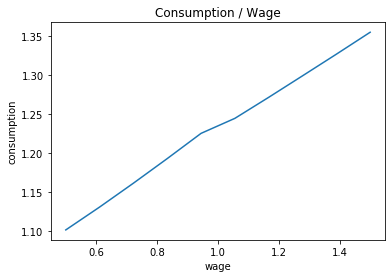

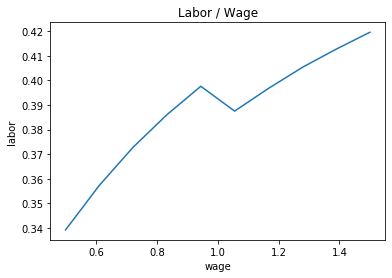

In [13]:
#Making plots to show how wage affects consumption and labor
plt.plot(wage, consumption);plt.title('Consumption / Wage');plt.xlabel('wage');plt.ylabel('consumption')
plt.show()
plt.plot(wage, labor);plt.title('Labor / Wage');plt.xlabel('wage');plt.ylabel('labor')
plt.show()

#Problem 3 

Since the wages are uniformly distributed, we can simply take the average of all individual-specific parameters and use them to calculate the average tax revenue from an individual. Multiplying this by the total number of inidividuals in the population gives the total tax revenue.

We do however use linspace in order to draw a Uniform distribution, which is possible due to the large N.

In [15]:
taxrev = []

for w in np.linspace(0.5,1.5,10000):
    test.w = w
    test.solve()
    taxrev.append(0.4 * test.w * test.l + 0.1 * max(test.w * test.l - 0.4 , 0))

taxrev

[0.06782634173472699,
 0.0678435756942773,
 0.06786081036811707,
 0.06787804547282011,
 0.06789528132030986,
 0.06791251775695523,
 0.06792975456028053,
 0.06794699236778409,
 0.06796423060969004,
 0.06798146941946917,
 0.06799870888081992,
 0.06801594897849758,
 0.06803318959843796,
 0.06805043080989379,
 0.06806767269837474,
 0.06808491519826672,
 0.06810215832611387,
 0.06811940195282187,
 0.06813664640269199,
 0.06815389122277024,
 0.06817113680971729,
 0.06818838307203995,
 0.06820562989189691,
 0.06822287729999164,
 0.06824012522245185,
 0.06825737388157833,
 0.06827462307959507,
 0.06829187300494774,
 0.06830912331373881,
 0.06832637446133631,
 0.06834362622936509,
 0.06836087839749938,
 0.06837813148680152,
 0.0683953850967125,
 0.0684126391937166,
 0.06842989394763697,
 0.06844714942107627,
 0.06846440534535142,
 0.06848166203767202,
 0.06849891925964798,
 0.06851617713268672,
 0.0685334356199272,
 0.06855069469974019,
 0.06856795454155581,
 0.06858521497316104,
 0.06860247595

In [16]:
aggtaxrev = np.sum(taxrev)
print('Tax revenue: ' + str(round(aggtaxrev, 2)) + ' USD')

Tax revenue: 1630.17 USD



Question 4.

In [18]:
class ConsumerClass3 : 
    def __init__(self):

        self.v = 10
        self.e = 0.1
        self.m = 1
        self.w = 1
        self.t0 = 0.4
        self.t1 = 0.1
        self.k = 0.4

    utility = utility
    solve = solve

In [19]:
test = ConsumerClass3()
test.solve()
print(f'Optimal allocation: (c,l) = ({test.c:.3f} , {test.l:.3f}) , u = {test.u:.3f}')

Optimal allocation: (c,l) = (1.398 , 0.717) , u = 0.312


In [20]:
taxrevnew = []

for w in np.linspace(0.5,1.5,10000):
    test.w = w
    test.solve()
    taxrevnew.append(0.4 * test.w * test.l + 0.1 * max(test.w * test.l - 0.4 , 0))

taxrevnew

[0.13826339581335975,
 0.1382933959381459,
 0.13832339687173983,
 0.13835339789683374,
 0.1383833995078937,
 0.13841340185596326,
 0.1384434046509094,
 0.1384734080962423,
 0.13850341200446675,
 0.13853341661682642,
 0.1385634213484113,
 0.1385934268381771,
 0.13862343280789838,
 0.13865343964361312,
 0.13868344682177694,
 0.13871345418520412,
 0.13874346276901708,
 0.13877347160628767,
 0.13880348063292336,
 0.1388334905747873,
 0.1388635012347229,
 0.1388935119853394,
 0.13892352330259894,
 0.1389535355097794,
 0.13898354783623068,
 0.13901356117478297,
 0.13904357479962057,
 0.1390735888152658,
 0.13910360347437936,
 0.13913361873855337,
 0.13916363457470743,
 0.13919365082856988,
 0.13922366738861944,
 0.1392536849083089,
 0.13928370307611007,
 0.13931372142780468,
 0.13934374039281172,
 0.1393737600264961,
 0.13940378016073607,
 0.13943380063419233,
 0.13946382193930684,
 0.1394938433893367,
 0.13952386572096298,
 0.13955388854228623,
 0.13958391191287897,
 0.13961393585763257,
 0

In [21]:
aggtaxrevnew = np.sum(taxrevnew)
print('Tax revenue: ' +str(round(aggtaxrevnew, 2)) + ' USD')

Tax revenue: 3196.38 USD


Problem 5

Same procedure as in problem 1, but we have to maximize our previous constraint and use our previous objective as the constraint. 

We continue to use epsilon = 0.1, and the values for l* and c*

In [23]:
tax_params = list([tau_0_guess , tau_1_guess , kappa_guess])

NameError: name 'tau_0_guess' is not defined

In [24]:
def midfun(state_objective(tax_params):

    """Defines function to calculate values of Tau and Kappa, and store the results for later calculations"""

    test = ConsumerClass4
    test.w = w
    test.t0 = tax_params[0]
    test.t1 = tax_params[1]
    test.k = tax_params[2]
    test.solve()
    l_star = test.l
    tax_rev = taxrev(l_star)
    return tax_rev

SyntaxError: invalid syntax (<ipython-input-24-79a4bcf9b754>, line 1)